# 2020 Post Season Projections

In [1]:
import pandas as pd

d = pd.read_csv('~/Downloads/mlb_elo_latest.csv')
d.shape

(922, 26)

In [2]:
d.head()

,date,season,neutral,playoff,team1,team2,elo1_pre,elo2_pre,elo_prob1,elo_prob2,...,pitcher1_rgs,pitcher2_rgs,pitcher1_adj,pitcher2_adj,rating_prob1,rating_prob2,rating1_post,rating2_post,score1,score2
0,2020-10-01,2020,0,c,SDP,STL,1523.681570,1518.731209,0.555323,0.444677,...,NaN,NaN,NaN,NaN,0.563662,0.436338,NaN,NaN,NaN,NaN
1,2020-10-01,2020,0,c,LAD,MIL,1595.308574,1504.062746,0.707763,0.292237,...,NaN,NaN,NaN,NaN,0.681864,0.318136,NaN,NaN,NaN,NaN
2,2020-10-01,2020,0,c,CHC,FLA,1522.339090,1473.076732,0.636987,0.363013,...,NaN,NaN,NaN,NaN,0.627817,0.372183,NaN,NaN,NaN,NaN
3,2020-10-01,2020,0,c,ATL,CIN,1539.012081,1500.488990,0.617720,0.382280,...,NaN,57.220006,NaN,13.143173,0.540359,0.459641,NaN,NaN,NaN,NaN
4,2020-09-30,2020,0,c,TBD,TOR,1561.455109,1501.210806,0.656244,0.343756,...,56.395814,NaN,12.589997,NaN,0.645150,0.354850,NaN,NaN,NaN,NaN


In [3]:
d.date.min(), d.date.max()

('2020-07-23', '2020-10-01')

In [4]:
d = d[d.date.le('2020-09-27')]
d.shape

(898, 26)

In [5]:
import numpy as np
rename_teams = {
    'ANA': 'LAA',
    'CHW': 'CWS',
    'FLA': 'MIA',
    'KCR': 'KC',
    'SDP': 'SD',
    'SFG': 'SF',
    'TBD': 'TB',
    'WSN': 'WSH'
}
d['team1'] = np.where(d.team1.isin(rename_teams), d.team1.map(rename_teams), d.team1)
d['team2'] = np.where(d.team2.isin(rename_teams), d.team2.map(rename_teams), d.team2)

In [6]:
d.head()

,date,season,neutral,playoff,team1,team2,elo1_pre,elo2_pre,elo_prob1,elo_prob2,...,pitcher1_rgs,pitcher2_rgs,pitcher1_adj,pitcher2_adj,rating_prob1,rating_prob2,rating1_post,rating2_post,score1,score2
24,2020-09-27,2020,0,NaN,STL,MIL,1516.773757,1506.020198,0.549848,0.450152,...,49.649779,50.501033,-7.348463,-2.464765,0.506401,0.493599,1512.135815,1509.101046,5.0,2.0
25,2020-09-27,2020,0,NaN,TB,PHI,1559.364855,1499.372724,0.618573,0.381427,...,47.171692,57.750792,-29.950748,28.407053,0.509891,0.490109,1557.827103,1497.827571,5.0,0.0
26,2020-09-27,2020,0,NaN,OAK,SEA,1546.342522,1481.520293,0.625112,0.374888,...,50.223631,54.879768,-2.275984,31.232185,0.571679,0.428321,1531.847158,1454.573391,6.0,2.0
27,2020-09-27,2020,0,NaN,MIN,CIN,1540.516532,1498.348865,0.594088,0.405912,...,53.877441,57.017249,1.369544,12.505863,0.546466,0.453534,1550.216205,1519.191241,3.0,5.0
28,2020-09-27,2020,0,NaN,LAD,LAA,1593.707374,1481.539764,0.686508,0.313492,...,47.400000,46.025396,-22.194560,-13.487280,0.652045,0.347955,1603.668369,1492.658170,5.0,0.0


In [7]:
d[['team1' ,'team2']].melt()['value']

0       STL
1        TB
2       OAK
3       MIN
4       LAD
       ... 
1791    TOR
1792    DET
1793    ATL
1794     SF
1795    NYY
Name: value, Length: 1796, dtype: object

In [8]:
from sklearn.preprocessing import OrdinalEncoder

encoder = OrdinalEncoder().fit(d[['team1', 'team2']].melt()[['value']])
d['home_team_id'] = encoder.transform(d[['team1']]).astype(int)
d['away_team_id'] = encoder.transform(d[['team2']]).astype(int)
d.head()

,date,season,neutral,playoff,team1,team2,elo1_pre,elo2_pre,elo_prob1,elo_prob2,...,pitcher1_adj,pitcher2_adj,rating_prob1,rating_prob2,rating1_post,rating2_post,score1,score2,home_team_id,away_team_id
24,2020-09-27,2020,0,NaN,STL,MIL,1516.773757,1506.020198,0.549848,0.450152,...,-7.348463,-2.464765,0.506401,0.493599,1512.135815,1509.101046,5.0,2.0,25,15
25,2020-09-27,2020,0,NaN,TB,PHI,1559.364855,1499.372724,0.618573,0.381427,...,-29.950748,28.407053,0.509891,0.490109,1557.827103,1497.827571,5.0,0.0,26,20
26,2020-09-27,2020,0,NaN,OAK,SEA,1546.342522,1481.520293,0.625112,0.374888,...,-2.275984,31.232185,0.571679,0.428321,1531.847158,1454.573391,6.0,2.0,19,23
27,2020-09-27,2020,0,NaN,MIN,CIN,1540.516532,1498.348865,0.594088,0.405912,...,1.369544,12.505863,0.546466,0.453534,1550.216205,1519.191241,3.0,5.0,16,5
28,2020-09-27,2020,0,NaN,LAD,LAA,1593.707374,1481.539764,0.686508,0.313492,...,-22.194560,-13.487280,0.652045,0.347955,1603.668369,1492.658170,5.0,0.0,13,12


In [9]:
d['home_team_win'] = d.score1.gt(d.score2).astype(int)
d['away_team_win'] = 1 - d.home_team_win
assert (d.home_team_win + d.away_team_win == 1).all()
d = d.groupby(['home_team_id', 'away_team_id', 'team1', 'team2'])[['home_team_win', 'away_team_win']].sum().reset_index()
d.head()

,home_team_id,away_team_id,team1,team2,home_team_win,away_team_win
0,0,7,ARI,COL,3,4
1,0,10,ARI,HOU,2,1
2,0,13,ARI,LAD,2,5
3,0,19,ARI,OAK,2,0
4,0,22,ARI,SD,3,0


In [10]:
d.shape

(239, 6)

In [11]:
d['total_games'] = d.home_team_win + d.away_team_win

In [12]:
import numpy as np
import pymc3 as pm
import theano
import theano.tensor as T

n_teams = len(d.home_team_id.unique())
n_games = len(d)
n_matchups = np.array([d.total_games, d.total_games]).T
home_team_id = d.home_team_id.values
away_team_id = d.away_team_id.values
observed_wins = d[['home_team_win', 'away_team_win']]


def softmax(a):
    # reshaping for broadcasting
    a = T.exp(a)
    sum_ = T.sum(a, axis=1).reshape((1, -1)).T
    return a / sum_


with pm.Model() as model:
    σ_a = pm.Exponential('σ_a', np.log(5))

    a_t = pm.Normal('a_t', mu=0, sigma=σ_a, shape=n_teams)
    a_1, a_2 = a_t[home_team_id], a_t[away_team_id]
    a = T.stack([a_1, a_2]).T

    p = pm.Deterministic('p', softmax(a))
    wins = pm.Binomial('wins', n=n_matchups, p=p, shape=(n_games, 2), observed=observed_wins)

    trace = pm.sample(5_000, tune=4_000)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [a_t, σ_a]


Sampling 2 chains for 4_000 tune and 5_000 draw iterations (8_000 + 10_000 draws total) took 18 seconds.


/opt/anaconda3/envs/py3.6/lib/python3.6/site-packages/arviz/data/io_pymc3.py:89: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  FutureWarning,


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x120a3aa90>,
      dtype=object)

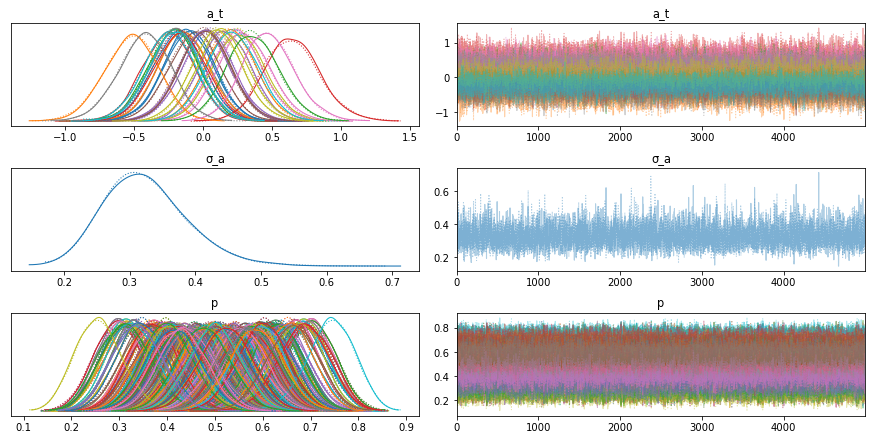

In [13]:
pm.traceplot(trace)

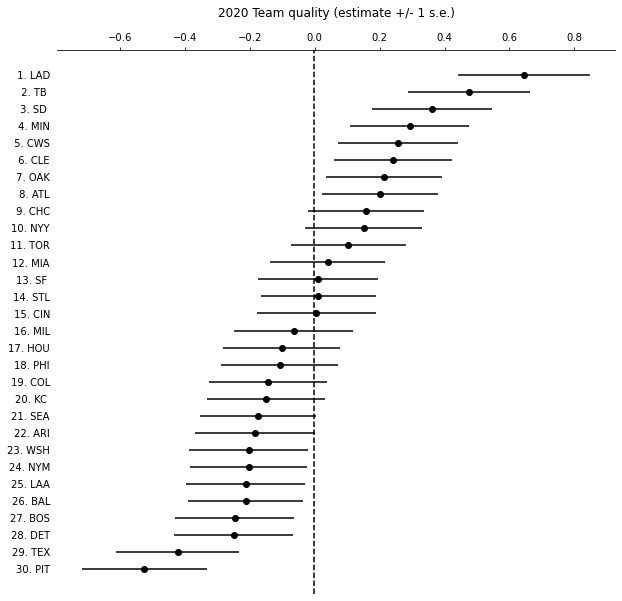

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

estimated_abilities = trace['a_t'][-5000:].mean(axis=0)
estimated_abilities_error = trace['a_t'][-5000:].std(axis=0)
team_id_lookup = {i: t for i, t in enumerate(encoder.categories_[0])}

center_line = np.mean(estimated_abilities)

values = list(reversed(estimated_abilities))
labels = list(reversed([team_id_lookup[i] for i in range(n_teams)]))
errors = list(reversed(estimated_abilities_error))

tmp = sorted(zip(values, labels, errors), key=lambda x: x[0])
values, labels, errors = zip(*tmp)
labels = [f'{n_teams-i:2}. {L:3}' for i, L in enumerate(labels)]

fig, ax = plt.subplots(figsize=(10, 10))

# remove borders
sns.despine(left=True, bottom=True, top=False)

# plot error bars
ax.errorbar(values, range(len(labels)), xerr=errors, fmt='o', color='k')

# label the y-adxis
plt.yticks(np.arange(len(labels)))
locs, _ = plt.yticks()
plt.yticks(locs, labels)
plt.tick_params(axis='y', which='both', left=False)

# give it a reference line
ax.axvline(center_line, linestyle='--', color='k')

# Move x axis to top
ax.xaxis.tick_top()

# polish it off with a title
_ = ax.set_title('2020 Team quality (estimate +/- 1 s.e.)', y=1.05)

plt.savefig('2020-postseason-projections/team-quality-estimates.png')

In [15]:
import json
with open('divisions.json') as f:
    divisions = json.load(f)
divisions = {team: division for division, teams in divisions.items() for team in teams}
divisions

{'CWS': 'AL Central',
 'CLE': 'AL Central',
 'DET': 'AL Central',
 'KC': 'AL Central',
 'MIN': 'AL Central',
 'BAL': 'AL East',
 'BOS': 'AL East',
 'NYY': 'AL East',
 'TB': 'AL East',
 'TOR': 'AL East',
 'HOU': 'AL West',
 'LAA': 'AL West',
 'OAK': 'AL West',
 'SEA': 'AL West',
 'TEX': 'AL West',
 'CHC': 'NL Central',
 'CIN': 'NL Central',
 'MIL': 'NL Central',
 'PIT': 'NL Central',
 'STL': 'NL Central',
 'ATL': 'NL East',
 'MIA': 'NL East',
 'NYM': 'NL East',
 'PHI': 'NL East',
 'WSH': 'NL East',
 'ARI': 'NL West',
 'COL': 'NL West',
 'LAD': 'NL West',
 'SD': 'NL West',
 'SF': 'NL West'}

In [16]:
results = pd.DataFrame({
    'Team': d.team1.drop_duplicates().sort_values(),
    'Division': d.team1.drop_duplicates().sort_values().map(divisions),
    'Wild Card Champion':0,
    'Division Champion': 0,
    'League Champion': 0,
    'World Series Champion': 0
})

In [17]:
%%time


import numpy as np


def np_softmax(a):
    a = np.exp(a)
    return a / a.sum()


class Simulation:
    def __init__(self, a_post, encoder):
        self.a_post = a_post
        self.encoder = encoder
        self._sample = None
        
    def __enter__(self):
        self._sample = self.a_post[np.random.choice(len(self.a_post))]
        return self
    
    def __exit__(self, *exc):
        self._sample = None
        return False
    
    def simulate_series(self, team1, team2, best_of):
        id1, id2 = self._team_id(team1), self._team_id(team2)
        a = self._sample[[id1, id2]]
        p = np_softmax(a)
        wins1 = np.random.binomial(best_of, p[0])
        return team1 if wins1 > best_of // 2 else team2
    
    def _team_id(self, team):
        return self.encoder.transform([[team]])[0, 0].astype(int)



n_sim = 10_000

def make_update_results(category):
    def wrapper(df, team):
        df.loc[df.Team.eq(team), category] += 1
    return wrapper

update_wildcard_champion = make_update_results('Wild Card Champion')
update_division_champion = make_update_results('Division Champion')
update_league_champion = make_update_results('League Champion')
update_world_series_champion = make_update_results('World Series Champion')

for _ in range(n_sim):
    with Simulation(trace['a_t'], encoder) as sim:

        # ALDS 1
        alwc1 = sim.simulate_series('TB', 'TOR', 3)
        alwc2 = sim.simulate_series('CLE', 'NYY', 3)
        update_wildcard_champion(results, alwc1)
        update_wildcard_champion(results, alwc2)

        alds1 = sim.simulate_series(alwc1, alwc2, 5)
        update_division_champion(results, alds1)

        # AL WC2
        alwc3 = sim.simulate_series('MIN', 'HOU', 3)
        alwc4 = sim.simulate_series('OAK', 'CWS', 3)
        update_wildcard_champion(results, alwc3)
        update_wildcard_champion(results, alwc4)

        alds2 = sim.simulate_series(alwc3, alwc4, 5)
        update_division_champion(results, alds2)

        # ALCS
        alcs = sim.simulate_series(alds1, alds2, 7)
        update_league_champion(results, alcs)

        # NLDS 1
        nlwc1 = sim.simulate_series('LAD', 'MIL', 3)
        nlwc2 = sim.simulate_series('SD', 'STL', 3)
        update_wildcard_champion(results, nlwc1)
        
        update_wildcard_champion(results, nlwc2)
        nlds1 = sim.simulate_series(nlwc1, nlwc2, 5)
        update_division_champion(results, nlds1)

        # NLDS 2
        nlwc3 = sim.simulate_series('CHC', 'MIA', 3)
        nlwc4 = sim.simulate_series('ATL', 'CIN', 3)
        update_wildcard_champion(results, nlwc3)
        update_wildcard_champion(results, nlwc4)
        
        nlds2 = sim.simulate_series(nlwc3, nlwc4, 5)
        update_division_champion(results, nlds2)

        # NLCS
        nlcs = sim.simulate_series(nlds1, nlds2, 7)
        update_league_champion(results, nlcs)

        # WS
        ws = sim.simulate_series(alcs, nlcs, 7)
        update_world_series_champion(results, ws)

results.loc[:, ['Wild Card Champion', 'Division Champion', 'League Champion', 'World Series Champion']] /= (n_sim / 100)

CPU times: user 5min 43s, sys: 2.83 s, total: 5min 46s
Wall time: 5min 53s


In [18]:
results.sort_values('World Series Champion', ascending=False, inplace=True)
results.set_index(np.arange(len(results)) + 1, inplace=True)
results

,Team,Division,Wild Card Champion,Division Champion,League Champion,World Series Champion
1,LAD,NL West,73.71,49.45,36.83,24.99
2,TB,AL East,63.53,38.99,24.55,14.06
3,SD,NL West,62.40,27.78,16.99,8.82
4,MIN,AL Central,63.52,32.49,16.25,7.99
5,CWS,AL Central,50.96,27.78,13.30,6.01
6,CLE,AL Central,53.53,24.90,12.71,5.86
7,ATL,NL East,57.18,30.84,11.88,5.63
8,OAK,AL West,49.04,26.72,12.44,5.58
9,CHC,NL Central,54.73,28.40,11.15,4.96
10,NYY,AL East,46.47,19.26,8.72,3.42


In [19]:
pd.concat([results.set_index(['Team', 'Division'])], keys=['Probability of Becomming'], axis=1)

Probability of Becomming                                    \
                      Wild Card Champion Division Champion League Champion   
Team Division                                                                
LAD  NL West                       73.71             49.45           36.83   
TB   AL East                       63.53             38.99           24.55   
SD   NL West                       62.40             27.78           16.99   
MIN  AL Central                    63.52             32.49           16.25   
CWS  AL Central                    50.96             27.78           13.30   
CLE  AL Central                    53.53             24.90           12.71   
ATL  NL East                       57.18             30.84           11.88   
OAK  AL West                       49.04             26.72           12.44   
CHC  NL Central                    54.73             28.40           11.15   
NYY  AL East                       46.47             19.26            8.72   
TOR  AL East                       36.47             16.85            7.92   
MIA  NL East                       45.27             21.01            6.70   
CIN  NL Central                    42.82             19.75            6.37   
STL  NL Central                    37.60             12.12            5.49   
MIL  NL Central                    26.29             10.65            4.59   
HOU  AL West                       36.48             13.01            4.11   
SEA  AL West                        0.00              0.00            0.00   
SF   NL West                        0.00              0.00            0.00   
PIT  NL Central                     0.00              0.00            0.00   
TEX  AL West                        0.00              0.00            0.00   
ARI  NL West                        0.00              0.00            0.00   
PHI  NL East                        0.00              0.00            0.00   
NYM  NL East                        0.00              0.00            0.00   
LAA  AL West                        0.00              0.00            0.00   
KC   AL Central                     0.00              0.00            0.00   
DET  AL Central                     0.00              0.00            0.00   
COL  NL West                        0.00              0.00            0.00   
BOS  AL East                        0.00              0.00            0.00   
BAL  AL East                        0.00              0.00            0.00   
WSH  NL East                        0.00              0.00            0.00   

                                       
                World Series Champion  
Team Division                          
LAD  NL West                    24.99  
TB   AL East                    14.06  
SD   NL West                     8.82  
MIN  AL Central                  7.99  
CWS  AL Central                  6.01  
CLE  AL Central                  5.86  
ATL  NL East                     5.63  
OAK  AL West                     5.58  
CHC  NL Central                  4.96  
NYY  AL East                     3.42  
TOR  AL East                     3.08  
MIA  NL East                     2.58  
CIN  NL Central                  2.19  
STL  NL Central                  2.17  
MIL  NL Central                  1.38  
HOU  AL West                     1.28  
SEA  AL West                     0.00  
SF   NL West                     0.00  
PIT  NL Central                  0.00  
TEX  AL West                     0.00  
ARI  NL West                     0.00  
PHI  NL East                     0.00  
NYM  NL East                     0.00  
LAA  AL West                     0.00  
KC   AL Central                  0.00  
DET  AL Central                  0.00  
COL  NL West                     0.00  
BOS  AL East                     0.00  
BAL  AL East                     0.00  
WSH  NL East                     0.00

In [20]:
assert np.isclose(results['World Series Champion'].sum(), 100.), results['World Series Champion'].sum()

# Get predictions from mlb.com
https://www.mlb.com/news/2020-mlb-postseason-predictions

In [21]:
mlb_predictions = pd.DataFrame({
    'Team': d.team1.drop_duplicates().sort_values(),
    'Division': d.team1.drop_duplicates().sort_values().map(divisions),
    'Wild Card Champion':0,
    'Division Champion': 0,
    'League Champion': 0,
    'World Series Champion': 0
})

# per richard justice
update_wildcard_champion(mlb_predictions, 'TB')
update_wildcard_champion(mlb_predictions, 'NYY')
update_wildcard_champion(mlb_predictions, 'MIN')
update_wildcard_champion(mlb_predictions, 'CWS')
update_wildcard_champion(mlb_predictions, 'STL')
update_wildcard_champion(mlb_predictions, 'LAD')
update_wildcard_champion(mlb_predictions, 'ATL')
update_wildcard_champion(mlb_predictions, 'CHC')

update_division_champion(mlb_predictions, 'CHC')
update_division_champion(mlb_predictions, 'MIN')
update_division_champion(mlb_predictions, 'LAD')
update_division_champion(mlb_predictions, 'ATL')

update_league_champion(mlb_predictions, 'LAD')
update_league_champion(mlb_predictions, 'TB')

update_world_series_champion(mlb_predictions, 'LAD')


# per jesse sanchez
update_wildcard_champion(mlb_predictions, 'TB')
update_wildcard_champion(mlb_predictions, 'NYY')
update_wildcard_champion(mlb_predictions, 'CWS')
update_wildcard_champion(mlb_predictions, 'MIN')
update_wildcard_champion(mlb_predictions, 'LAD')
update_wildcard_champion(mlb_predictions, 'SD')
update_wildcard_champion(mlb_predictions, 'MIA')
update_wildcard_champion(mlb_predictions, 'CIN')

update_division_champion(mlb_predictions, 'TB')
update_division_champion(mlb_predictions, 'CWS')
update_division_champion(mlb_predictions, 'LAD')
update_division_champion(mlb_predictions, 'CIN')

update_league_champion(mlb_predictions, 'LAD')
update_league_champion(mlb_predictions, 'TB')

update_world_series_champion(mlb_predictions, 'LAD')


# per jesse sanchez
update_wildcard_champion(mlb_predictions, 'TB')
update_wildcard_champion(mlb_predictions, 'NYY')
update_wildcard_champion(mlb_predictions, 'MIN')
update_wildcard_champion(mlb_predictions, 'OAK')
update_wildcard_champion(mlb_predictions, 'SD')
update_wildcard_champion(mlb_predictions, 'LAD')
update_wildcard_champion(mlb_predictions, 'CIN')
update_wildcard_champion(mlb_predictions, 'MIA')

update_division_champion(mlb_predictions, 'MIN')
update_division_champion(mlb_predictions, 'TB')
update_division_champion(mlb_predictions, 'LAD')
update_division_champion(mlb_predictions, 'CIN')

update_league_champion(mlb_predictions, 'LAD')
update_league_champion(mlb_predictions, 'TB')

update_world_series_champion(mlb_predictions, 'TB')


# per mark feinsand
update_wildcard_champion(mlb_predictions, 'TB')
update_wildcard_champion(mlb_predictions, 'NYY')
update_wildcard_champion(mlb_predictions, 'CWS')
update_wildcard_champion(mlb_predictions, 'MIN')
update_wildcard_champion(mlb_predictions, 'LAD')
update_wildcard_champion(mlb_predictions, 'SD')
update_wildcard_champion(mlb_predictions, 'CHC')
update_wildcard_champion(mlb_predictions, 'CIN')

update_division_champion(mlb_predictions, 'TB')
update_division_champion(mlb_predictions, 'MIN')
update_division_champion(mlb_predictions, 'CIN')
update_division_champion(mlb_predictions, 'SD')

update_league_champion(mlb_predictions, 'SD')
update_league_champion(mlb_predictions, 'TB')

update_world_series_champion(mlb_predictions, 'TB')


# per sarah langs
update_wildcard_champion(mlb_predictions, 'TB')
update_wildcard_champion(mlb_predictions, 'CLE')
update_wildcard_champion(mlb_predictions, 'OAK')
update_wildcard_champion(mlb_predictions, 'MIN')
update_wildcard_champion(mlb_predictions, 'LAD')
update_wildcard_champion(mlb_predictions, 'SD')
update_wildcard_champion(mlb_predictions, 'CIN')
update_wildcard_champion(mlb_predictions, 'CHC')

update_division_champion(mlb_predictions, 'TB')
update_division_champion(mlb_predictions, 'MIN')
update_division_champion(mlb_predictions, 'LAD')
update_division_champion(mlb_predictions, 'CIN')

update_league_champion(mlb_predictions, 'TB')
update_league_champion(mlb_predictions, 'LAD')

update_world_series_champion(mlb_predictions, 'LAD')


# per anthony castrovince
update_wildcard_champion(mlb_predictions, 'TB')
update_wildcard_champion(mlb_predictions, 'NYY')
update_wildcard_champion(mlb_predictions, 'CWS')
update_wildcard_champion(mlb_predictions, 'MIN')
update_wildcard_champion(mlb_predictions, 'LAD')
update_wildcard_champion(mlb_predictions, 'SD')
update_wildcard_champion(mlb_predictions, 'MIA')
update_wildcard_champion(mlb_predictions, 'CIN')

update_division_champion(mlb_predictions, 'NYY')
update_division_champion(mlb_predictions, 'MIN')
update_division_champion(mlb_predictions, 'LAD')
update_division_champion(mlb_predictions, 'CIN')

update_league_champion(mlb_predictions, 'LAD')
update_league_champion(mlb_predictions, 'NYY')

update_world_series_champion(mlb_predictions, 'LAD')


# per will leitch
update_wildcard_champion(mlb_predictions, 'TB')
update_wildcard_champion(mlb_predictions, 'CLE')
update_wildcard_champion(mlb_predictions, 'CWS')
update_wildcard_champion(mlb_predictions, 'MIN')
update_wildcard_champion(mlb_predictions, 'LAD')
update_wildcard_champion(mlb_predictions, 'STL')
update_wildcard_champion(mlb_predictions, 'CHC')
update_wildcard_champion(mlb_predictions, 'ATL')

update_division_champion(mlb_predictions, 'CLE')
update_division_champion(mlb_predictions, 'MIN')
update_division_champion(mlb_predictions, 'LAD')
update_division_champion(mlb_predictions, 'ATL')

update_league_champion(mlb_predictions, 'LAD')
update_league_champion(mlb_predictions, 'CLE')

update_world_series_champion(mlb_predictions, 'CLE')


# per mike petriello
update_wildcard_champion(mlb_predictions, 'TB')
update_wildcard_champion(mlb_predictions, 'NYY')
update_wildcard_champion(mlb_predictions, 'MIN')
update_wildcard_champion(mlb_predictions, 'OAK')
update_wildcard_champion(mlb_predictions, 'SD')
update_wildcard_champion(mlb_predictions, 'LAD')
update_wildcard_champion(mlb_predictions, 'CIN')
update_wildcard_champion(mlb_predictions, 'CHC')

update_division_champion(mlb_predictions, 'NYY')
update_division_champion(mlb_predictions, 'MIN')
update_division_champion(mlb_predictions, 'LAD')
update_division_champion(mlb_predictions, 'CIN')

update_league_champion(mlb_predictions, 'LAD')
update_league_champion(mlb_predictions, 'NYY')

update_world_series_champion(mlb_predictions, 'LAD')


# per nathalie alonso
update_wildcard_champion(mlb_predictions, 'TB')
update_wildcard_champion(mlb_predictions, 'NYY')
update_wildcard_champion(mlb_predictions, 'MIN')
update_wildcard_champion(mlb_predictions, 'OAK')
update_wildcard_champion(mlb_predictions, 'LAD')
update_wildcard_champion(mlb_predictions, 'SD')
update_wildcard_champion(mlb_predictions, 'CIN')
update_wildcard_champion(mlb_predictions, 'ATL')

update_division_champion(mlb_predictions, 'TB')
update_division_champion(mlb_predictions, 'OAK')
update_division_champion(mlb_predictions, 'LAD')
update_division_champion(mlb_predictions, 'CIN')

update_league_champion(mlb_predictions, 'LAD')
update_league_champion(mlb_predictions, 'TB')

update_world_series_champion(mlb_predictions, 'LAD')


# per andrew simon
update_wildcard_champion(mlb_predictions, 'TB')
update_wildcard_champion(mlb_predictions, 'CLE')
update_wildcard_champion(mlb_predictions, 'CWS')
update_wildcard_champion(mlb_predictions, 'MIN')
update_wildcard_champion(mlb_predictions, 'LAD')
update_wildcard_champion(mlb_predictions, 'CIN')
update_wildcard_champion(mlb_predictions, 'MIA')
update_wildcard_champion(mlb_predictions, 'SD')

update_division_champion(mlb_predictions, 'TB')
update_division_champion(mlb_predictions, 'MIN')
update_division_champion(mlb_predictions, 'LAD')
update_division_champion(mlb_predictions, 'CIN')

update_league_champion(mlb_predictions, 'LAD')
update_league_champion(mlb_predictions, 'TB')

update_world_series_champion(mlb_predictions, 'LAD')


# per jon paul morosi
update_wildcard_champion(mlb_predictions, 'TOR')
update_wildcard_champion(mlb_predictions, 'NYY')
update_wildcard_champion(mlb_predictions, 'MIN')
update_wildcard_champion(mlb_predictions, 'OAK')
update_wildcard_champion(mlb_predictions, 'LAD')
update_wildcard_champion(mlb_predictions, 'SD')
update_wildcard_champion(mlb_predictions, 'MIA')
update_wildcard_champion(mlb_predictions, 'CIN')

update_division_champion(mlb_predictions, 'NYY')
update_division_champion(mlb_predictions, 'OAK')
update_division_champion(mlb_predictions, 'LAD')
update_division_champion(mlb_predictions, 'CIN')

update_league_champion(mlb_predictions, 'LAD')
update_league_champion(mlb_predictions, 'NYY')

update_world_series_champion(mlb_predictions, 'LAD')


# per david venn

update_wildcard_champion(mlb_predictions, 'TB')
update_wildcard_champion(mlb_predictions, 'NYY')
update_wildcard_champion(mlb_predictions, 'CWS')
update_wildcard_champion(mlb_predictions, 'MIN')
update_wildcard_champion(mlb_predictions, 'LAD')
update_wildcard_champion(mlb_predictions, 'SD')
update_wildcard_champion(mlb_predictions, 'MIA')
update_wildcard_champion(mlb_predictions, 'CIN')

update_division_champion(mlb_predictions, 'NYY')
update_division_champion(mlb_predictions, 'MIN')
update_division_champion(mlb_predictions, 'LAD')
update_division_champion(mlb_predictions, 'CIN')

update_league_champion(mlb_predictions, 'LAD')
update_league_champion(mlb_predictions, 'NYY')

update_world_series_champion(mlb_predictions, 'LAD')

mlb_predictions.loc[:, ['Wild Card Champion', 'Division Champion', 'League Champion', 'World Series Champion']] /= (12 / 100)
mlb_predictions[['Wild Card Champion', 'Division Champion', 'League Champion', 'World Series Champion']] = mlb_predictions[['Wild Card Champion', 'Division Champion', 'League Champion', 'World Series Champion']].round()

# Get fivethirtyeight predictions
https://projects.fivethirtyeight.com/2020-mlb-predictions/

In [22]:
fivethirtyeight_predictions = pd.read_html('https://web.archive.org/web/20200929183851/https://projects.fivethirtyeight.com/2020-mlb-predictions/')
fivethirtyeight_predictions = fivethirtyeight_predictions[2].droplevel(0, axis=1).iloc[:, [0, 1, 4, 5, 6, 7]]
fivethirtyeight_predictions.columns = [
    'Team',
    'Division',
    'Wild Card Champion',
    'Division Champion',
    'League Champion',
    'World Series Champion'
]
fivethirtyeight_predictions.replace('—', '0%', inplace=True)
fivethirtyeight_predictions.replace('<1%', '0%', inplace=True)
for col in ['Wild Card Champion', 'Division Champion', 'League Champion', 'World Series Champion']:
    fivethirtyeight_predictions[col] = fivethirtyeight_predictions[col].str[:-1].astype(float)
fivethirtyeight_predictions

,Team,Division,Wild Card Champion,Division Champion,League Champion,World Series Champion
0,DodgersDodgers,NL West,78.0,58.0,45.0,32.0
1,RaysRays,AL East,68.0,37.0,21.0,10.0
2,YankeesYankees,AL East,54.0,30.0,17.0,8.0
3,TwinsTwins,AL Central,55.0,32.0,17.0,7.0
4,BravesBraves,NL East,58.0,35.0,13.0,7.0
5,AstrosAstros,AL West,45.0,25.0,13.0,5.0
6,PadresPadres,NL West,58.0,20.0,11.0,5.0
7,CubsCubs,NL Central,69.0,33.0,11.0,5.0
8,AthleticsAthletics,AL West,57.0,26.0,12.0,5.0
9,IndiansIndians,AL Central,46.0,21.0,10.0,4.0


In [23]:
fivethirtyeight_rename = {
    'DodgersDodgers': 'LAD',
    'RaysRays': 'TB',
    'TwinsTwins': 'MIN',
    'YankeesYankees': 'NYY',
    'BravesBraves': 'ATL',
    'PadresPadres': 'SD',
    'AstrosAstros': 'HOU',
    'AthleticsAthletics': 'OAK',
    'CubsCubs': 'CHC',
    'IndiansIndians': 'CLE',
    'RedsReds': 'CIN',
    'White SoxWhite Sox': 'CWS',
    'CardinalsCardinals': 'STL',
    'BrewersBrewers': 'MIL',
    'Blue JaysBlue Jays': 'TOR',
    'MarlinsMarlins': 'MIA',
    'GiantsGiants': 'SF',
    'PhilliesPhillies': 'PHI',
    'MarinersMariners': 'SEA',
    'NationalsNationals': 'WSH',
    'MetsMets': 'NYM',
    'RockiesRockies': 'COL',
    'RoyalsRoyals': 'KC',
    'AngelsAngels': 'LAA',
    'OriolesOrioles': 'BAL',
    'DiamondbacksDbacks': 'ARI',
    'Red SoxRed Sox': 'BOS',
    'TigersTigers': 'DET',
    'RangersRangers': 'TEX',
    'PiratesPirates': 'PIT',
}
fivethirtyeight_predictions['Team'] = fivethirtyeight_predictions.Team.map(fivethirtyeight_rename)
fivethirtyeight_predictions['Division'] = fivethirtyeight_predictions.Division.str.strip()

In [24]:
fivethirtyeight_predictions

,Team,Division,Wild Card Champion,Division Champion,League Champion,World Series Champion
0,LAD,NL West,78.0,58.0,45.0,32.0
1,TB,AL East,68.0,37.0,21.0,10.0
2,NYY,AL East,54.0,30.0,17.0,8.0
3,MIN,AL Central,55.0,32.0,17.0,7.0
4,ATL,NL East,58.0,35.0,13.0,7.0
5,HOU,AL West,45.0,25.0,13.0,5.0
6,SD,NL West,58.0,20.0,11.0,5.0
7,CHC,NL Central,69.0,33.0,11.0,5.0
8,OAK,AL West,57.0,26.0,12.0,5.0
9,CLE,AL Central,46.0,21.0,10.0,4.0


# Create final data frame with all predictions

In [25]:
final = pd.concat([
    results.set_index(['Team', 'Division']),
    mlb_predictions.set_index(['Team', 'Division']),
    fivethirtyeight_predictions.set_index(['Team', 'Division'])
], axis=1, keys=['DG: Probability of Becomming', 'MLB: Probability of Becomming', 'fivethirtyeight: Probability of Becomming'])
final.sort_values([('DG: Probability of Becomming', 'World Series Champion')], ascending=False)

DG: Probability of Becomming                    \
                          Wild Card Champion Division Champion   
Team Division                                                    
LAD  NL West                           73.71             49.45   
TB   AL East                           63.53             38.99   
SD   NL West                           62.40             27.78   
MIN  AL Central                        63.52             32.49   
CWS  AL Central                        50.96             27.78   
CLE  AL Central                        53.53             24.90   
ATL  NL East                           57.18             30.84   
OAK  AL West                           49.04             26.72   
CHC  NL Central                        54.73             28.40   
NYY  AL East                           46.47             19.26   
TOR  AL East                           36.47             16.85   
MIA  NL East                           45.27             21.01   
CIN  NL Central                        42.82             19.75   
STL  NL Central                        37.60             12.12   
MIL  NL Central                        26.29             10.65   
HOU  AL West                           36.48             13.01   
SEA  AL West                            0.00              0.00   
SF   NL West                            0.00              0.00   
PIT  NL Central                         0.00              0.00   
TEX  AL West                            0.00              0.00   
ARI  NL West                            0.00              0.00   
PHI  NL East                            0.00              0.00   
NYM  NL East                            0.00              0.00   
LAA  AL West                            0.00              0.00   
KC   AL Central                         0.00              0.00   
DET  AL Central                         0.00              0.00   
COL  NL West                            0.00              0.00   
BOS  AL East                            0.00              0.00   
BAL  AL East                            0.00              0.00   
WSH  NL East                            0.00              0.00   

                                                       \
                League Champion World Series Champion   
Team Division                                           
LAD  NL West              36.83                 24.99   
TB   AL East              24.55                 14.06   
SD   NL West              16.99                  8.82   
MIN  AL Central           16.25                  7.99   
CWS  AL Central           13.30                  6.01   
CLE  AL Central           12.71                  5.86   
ATL  NL East              11.88                  5.63   
OAK  AL West              12.44                  5.58   
CHC  NL Central           11.15                  4.96   
NYY  AL East               8.72                  3.42   
TOR  AL East               7.92                  3.08   
MIA  NL East               6.70                  2.58   
CIN  NL Central            6.37                  2.19   
STL  NL Central            5.49                  2.17   
MIL  NL Central            4.59                  1.38   
HOU  AL West               4.11                  1.28   
SEA  AL West               0.00                  0.00   
SF   NL West               0.00                  0.00   
PIT  NL Central            0.00                  0.00   
TEX  AL West               0.00                  0.00   
ARI  NL West               0.00                  0.00   
PHI  NL East               0.00                  0.00   
NYM  NL East               0.00                  0.00   
LAA  AL West               0.00                  0.00   
KC   AL Central            0.00                  0.00   
DET  AL Central            0.00                  0.00   
COL  NL West               0.00                  0.00   
BOS  AL East               0.00                  0.00   
BAL  AL East               0.00                  0.00   
WSH  NL East 

# Evaluations

In [67]:
wild_card_champion = 'Wild Card Champion'
division_champion = 'Division Champion'
league_champion = 'League Champion'
world_series_champion = 'World Series Champion'

outcomes = pd.DataFrame([
    {'Team': 'LAD', wild_card_champion: 1, division_champion: 1, league_champion: 1},
    {'Team': 'SD', wild_card_champion: 1},
    {'Team': 'MIA', wild_card_champion: 1},
    {'Team': 'ATL', wild_card_champion: 1, division_champion: 1},
    {'Team': 'TB', wild_card_champion: 1, division_champion: 1, league_champion: 1},
    {'Team': 'NYY', wild_card_champion: 1},
    {'Team': 'HOU', wild_card_champion: 1, division_champion: 1},
    {'Team': 'OAK', wild_card_champion: 1}
])
outcomes.fillna(0, inplace=True)
outcomes

,Team,Wild Card Champion,Division Champion,League Champion
0,LAD,1,1.0,1.0
1,SD,1,0.0,0.0
2,MIA,1,0.0,0.0
3,ATL,1,1.0,0.0
4,TB,1,1.0,1.0
5,NYY,1,0.0,0.0
6,HOU,1,1.0,0.0
7,OAK,1,0.0,0.0


In [74]:
losers = pd.DataFrame({
    'Team': [t for t in divisions if not t in outcomes.Team.values],
    wild_card_champion: 0,
    division_champion: 0,
    league_champion: 0
})
outcomes = pd.concat([outcomes, losers])
outcomes.head()

,Team,Wild Card Champion,Division Champion,League Champion
0,LAD,1,1.0,1.0
1,SD,1,0.0,0.0
2,MIA,1,0.0,0.0
3,ATL,1,1.0,0.0
4,TB,1,1.0,1.0


In [82]:
all_predictions = {
    k: final[k].droplevel(1, axis=0)
    for k in final.columns.get_level_values(0).unique()
}
all_predictions.keys()

dict_keys(['DG: Probability of Becomming', 'MLB: Probability of Becomming', 'fivethirtyeight: Probability of Becomming'])

In [83]:
from sklearn.metrics import log_loss

for prognosticator, projections in all_predictions.items():
    r = projections.merge(outcomes, left_index=True, right_on='Team', validate='1:1')
    print(prognosticator, log_loss(r[['Wild Card Champion_y']].values.ravel(), r[['Wild Card Champion_x']].values.ravel() / 100))

DG: Probability of Becomming 0.3379392902517807
MLB: Probability of Becomming 2.5441421866959684
fivethirtyeight: Probability of Becomming 0.32477159508612735


In [86]:
from sklearn.metrics import log_loss

for prognosticator, projections in all_predictions.items():
    r = projections.merge(outcomes, left_index=True, right_on='Team', validate='1:1')
    print(prognosticator, log_loss(r[['Division Champion_y']].values.ravel(), r[['Division Champion_x']].values.ravel() / 100))

DG: Probability of Becomming 0.2644376639766569
MLB: Probability of Becomming 1.3721948936646053
fivethirtyeight: Probability of Becomming 0.2256538209530657


In [89]:
from sklearn.metrics import log_loss

for prognosticator, projections in all_predictions.items():
    r = projections.merge(outcomes, left_index=True, right_on='Team', validate='1:1')
    print(prognosticator, log_loss(r[['League Champion_y']].values.ravel(), r[['League Champion_x']].values.ravel() / 100))

DG: Probability of Becomming 0.12924622761695934
MLB: Probability of Becomming 0.03984498562853254
fivethirtyeight: Probability of Becomming 0.12653116802750514
